In [35]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [25]:
%%micropython -unix 1

import array

a = array.array('H', [1, 2, 3])
print(a.itemsize())


Traceback (most recent call last):
  File "/dev/shm/micropython.py", line 5, in <module>
AttributeError: 'array' object has no attribute 'itemsize'



In [129]:
a = array(range(9))
median(a)

4.0

In [38]:
%%micropython -unix 1

import ulab as np
a = np.array(range(9), dtype=np.uint8)
print('a:\n', a)
print('\nfirst derivative:\n', np.diff(a, n=1))
print('\nsecond derivative:\n', np.diff(a, n=2))
c = np.array([[1, 2, 3, 4], [4, 3, 2, 1], [1, 4, 9, 16], [0, 0, 0, 0]])
print('\nc:\n', c)
print('\nfirst derivative, first axis:\n', np.diff(c, axis=0))
print('\nfirst derivative, second axis:\n', np.diff(c, axis=1))

a:
 array([0, 1, 2, 3, 4, 5, 6, 7, 8], dtype=uint8)

first derivative:
 array([1, 1, 1, 1, 1, 1, 1, 1], dtype=uint8)

second derivative:
 array([0, 0, 0, 0, 0, 0, 0], dtype=uint8)

c:
 array([[1.0, 2.0, 3.0, 4.0],
       [4.0, 3.0, 2.0, 1.0],
       [1.0, 4.0, 9.0, 16.0],
       [0.0, 0.0, 0.0, 0.0]], dtype=float64)

first derivative, first axis:
 array([[3.0, 1.0, -1.0, -3.0],
       [-3.0, 1.0, 7.0, 15.0],
       [-1.0, -4.0, -9.0, -16.0]], dtype=float64)

first derivative, second axis:
 array([[1.0, 1.0, 1.0],
       [-1.0, -1.0, -1.0],
       [3.0, 5.0, 7.0],
       [0.0, 0.0, 0.0]], dtype=float64)




In [5]:
%%micropython -unix 1

import ulab

a = ulab.array(range(9), dtype=ulab.uint16).reshape((3,3))
b = 1+ulab.array(range(3))

print(a < b)

array([[True, True, True],
       [False, False, False],
       [False, False, False]], dtype=bool)




In [535]:
a = numpy.array([1, 2, 3], dtype=int16)
b = numpy.array([4, 5, 6], dtype=uint16)
c = numpy.cross(a, b)
c

array([-3,  6, -3], dtype=int32)

In [439]:
%%micropython -unix 1

import ulab

a = ulab.array(range(9), dtype=ulab.uint8).reshape((3, 3))
print(a)
b = ulab.numerical.flip(a, axis=0)
print(b)

array([[0, 1, 2],
	[3, 4, 5],
	[6, 7, 8], dtype=uint8)
array([[6, 7, 8],
	[3, 4, 5],
	[0, 1, 2], dtype=uint8)




In [325]:
%%micropython -unix 1

import ulab as np
    
a = np.array(range(16), dtype=np.uint8).reshape((4,4))
b = np.array([1, 2, 3], dtype=np.uint8)
print(np.mean(np.mean(a, axis=0), axis=0))

7.5




In [4]:
%%micropython -unix 1

import ulab
a = ulab.array([[1.0, 2.0], [3.0, 4.0]])
b = ulab.array([[1.0, 2.0, 3.0, 4.0], [5.0, 6.0, 7.0, 8.0]])
print(a)
print(b)
print(ulab.linalg.dot(a, b))

array([[1.0, 2.0],
	 [3.0, 4.0]], dtype=float)
array([[1.0, 2.0, 3.0, 4.0],
	 [5.0, 6.0, 7.0, 8.0]], dtype=float)
array([[11.0, 14.0, 17.0, 20.0],
	 [23.0, 30.0, 37.0, 44.0]], dtype=float)




In [55]:
a = array([[1.0, 2.0], [3.0, 4.0]])
b = array([[1.0, 2.0, 3.0, 4.0], [5.0, 6.0, 7.0, 8.0]])
print(a)
print(b)
dot(a, b)

[[1. 2.]
 [3. 4.]]
[[1. 2. 3. 4.]
 [5. 6. 7. 8.]]


array([[11., 14., 17., 20.],
       [23., 30., 37., 44.]])

# Environmental settings and magic commands

In [1]:
%cd ../../micropython/ports/unix/

/home/v923z/sandbox/micropython/v1.11/micropython/ports/unix


In [2]:
from IPython.core.magic import Magics, magics_class, line_cell_magic
from IPython.core.magic import cell_magic, register_cell_magic, register_line_magic
from IPython.core.magic_arguments import argument, magic_arguments, parse_argstring
import subprocess
import os

## micropython magic command

In [3]:
@magics_class
class PyboardMagic(Magics):
    @cell_magic
    @magic_arguments()
    @argument('-skip')
    @argument('-unix')
    @argument('-file')
    @argument('-data')
    @argument('-time')
    @argument('-memory')
    def micropython(self, line='', cell=None):
        args = parse_argstring(self.micropython, line)
        if args.skip: # doesn't care about the cell's content
            print('skipped execution')
            return None # do not parse the rest
        if args.unix: # tests the code on the unix port. Note that this works on unix only
            with open('/dev/shm/micropython.py', 'w') as fout:
                fout.write(cell)
            proc = subprocess.Popen(["./micropython", "/dev/shm/micropython.py"], 
                                    stdout=subprocess.PIPE, stderr=subprocess.PIPE)
            print(proc.stdout.read().decode("utf-8"))
            print(proc.stderr.read().decode("utf-8"))
            return None
        if args.file: # can be used to copy the cell content onto the pyboard's flash
            spaces = "    "
            try:
                with open(args.file, 'w') as fout:
                    fout.write(cell.replace('\t', spaces))
                    printf('written cell to {}'.format(args.file))
            except:
                print('Failed to write to disc!')
            return None # do not parse the rest
        if args.data: # can be used to load data from the pyboard directly into kernel space
            message = pyb.exec(cell)
            if len(message) == 0:
                print('pyboard >>>')
            else:
                print(message.decode('utf-8'))
                # register new variable in user namespace
                self.shell.user_ns[args.data] = string_to_matrix(message.decode("utf-8"))
        
        if args.time: # measures the time of executions
            pyb.exec('import utime')
            message = pyb.exec('t = utime.ticks_us()\n' + cell + '\ndelta = utime.ticks_diff(utime.ticks_us(), t)' + 
                               "\nprint('execution time: {:d} us'.format(delta))")
            print(message.decode('utf-8'))
        
        if args.memory: # prints out memory information 
            message = pyb.exec('from micropython import mem_info\nprint(mem_info())\n')
            print("memory before execution:\n========================\n", message.decode('utf-8'))
            message = pyb.exec(cell)
            print(">>> ", message.decode('utf-8'))
            message = pyb.exec('print(mem_info())')
            print("memory after execution:\n========================\n", message.decode('utf-8'))

        else:
            message = pyb.exec(cell)
            print(message.decode('utf-8'))

ip = get_ipython()
ip.register_magics(PyboardMagic)

In [34]:
fft.fft([1, 2, 3])

NameError: name 'fft' is not defined

In [33]:
%%micropython -unix 1

from ulab import numpy as np

a = np.linspace(1,10,10, dtype = np.int16)
print(a.tobytes())
print(np.linspace(1,10,10, dtype = np.int8).tobytes())

bytearray(b'\x01\x00\x02\x00\x03\x00\x04\x00\x05\x00\x06\x00\x07\x00\x08\x00\t\x00\n\x00')
bytearray(b'\x01\x02\x03\x04\x05\x06\x07\x08\t\n')




In [22]:
%%micropython -unix 1

import ulab as np

print(dir(np))
print(dir(np.approx))
x = np.ndarray([2, 3, 4, 1, 5], dtype=np.uint8)
# # x.sort()
print(x + x)
print(np.vector.sin(x))

['__class__', '__name__', 'bool', '__version__', 'approx', 'array', 'dtype', 'e', 'float', 'inf', 'int16', 'int8', 'nan', 'ndarray', 'pi', 'uint16', 'uint8', 'vector']
['__class__', '__name__', 'bisect', 'fmin', 'interp', 'newton', 'trapz']
array([4, 6, 8, 2, 10], dtype=uint16)
array([0.9092974268256818, 0.1411200080598672, -0.7568024953079282, 0.8414709848078965, -0.9589242746631385], dtype=float64)




In [147]:
np.array([1, 2, 3])

array([1, 2, 3])

In [191]:
a = bytes(range(1, 9))

frombuffer(a, dtype=np.uint16, count=-4, offset=2)

array([1027, 1541, 2055], dtype=uint16)

In [226]:
%%micropython -unix 1

from ulab import numpy as np

np.set_printoptions(edgeitems=10)
a = bytes(range(0, 16))
print(a)
print()
print(np.frombuffer(a, dtype=np.uint8))
print(np.frombuffer(a, dtype=np.uint16))
print(np.frombuffer(a, dtype=np.float))

b'\x00\x01\x02\x03\x04\x05\x06\x07\x08\t\n\x0b\x0c\r\x0e\x0f'

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15], dtype=uint8)
array([256, 770, 1284, 1798, 2312, 2826, 3340, 3854], dtype=uint16)
array([7.949928895127362e-275, 3.691916204865093e-236], dtype=float64)




In [223]:
%%micropython -unix 1

from ulab import numpy as np
from ulab import scipy as spy

x = np.linspace(-np.pi, np.pi, num=8)
y = np.sin(x)

a = spy.signal.spectrogram(y)
print(a)

array([0.0, 3.578148333593648, 0.8866838581002703, 0.5428528178480891, 0.4815746188075286, 0.5428528178480885, 0.8866838581002703, 3.578148333593647], dtype=float64)




In [224]:
x = np.linspace(-np.pi, np.pi, num=8)
y = np.sin(x)

a = np.fft.fft(y)
print(a.real**2 + a.imag**2)

[ 0.         12.8031455   0.78620826  0.29468918  0.23191411  0.29468918
  0.78620826 12.8031455 ]


In [217]:
a = bytes(range(0, 16))

print(np.frombuffer(a, dtype=np.uint8))
print(np.frombuffer(a, dtype=np.uint16))
print(np.frombuffer(a, dtype=np.float))

[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15]
[ 256  770 1284 1798 2312 2826 3340 3854]
[7.9499289e-275 3.6919162e-236]


In [213]:
a = bytes(range(0, 16))
b = np.frombuffer(a, dtype=np.uint16)
c = np.frombuffer(a, dtype=np.uint16)

In [214]:
c[0] = 33

ValueError: assignment destination is read-only

In [212]:
a[0] = 33
b

TypeError: 'bytes' object does not support item assignment

In [100]:
a = array(range(20)).reshape((4, 5))
rot90(a)

array([[ 4,  9, 14, 19],
       [ 3,  8, 13, 18],
       [ 2,  7, 12, 17],
       [ 1,  6, 11, 16],
       [ 0,  5, 10, 15]])

In [509]:
%%micropython -unix 1

import ulab as np

print(np.__version__)

print(np.full((2,2), 3, dtype=np.uint8))
print()
print(np.zeros((2,2,2), dtype=np.uint16))
print()
# print(np.ones((2,2,2,2), dtype=np.float))

1.4.3-3D-numpy
array([[3, 3],
       [3, 3]], dtype=uint8)

array([[[0, 0],
       [0, 0]],

       [[0, 0],
       [0, 0]]], dtype=uint16)





In [521]:
%%micropython -unix 1

import ulab as np

print(np.__version__)

a = np.array([range(255-5, 255),range(240-5, 240),range(250-5,250)], dtype=np.int8)
print(a)
print(np.min(a))

1.4.5-2D-cpy
array([[-6, -5, -4, -3, -2],
       [-21, -20, -19, -18, -17],
       [-11, -10, -9, -8, -7]], dtype=int8)

Traceback (most recent call last):
  File "/dev/shm/micropython.py", line 8, in <module>
AttributeError: 'module' object has no attribute 'min'



In [411]:
dtype('uint8')

dtype('uint8')

In [402]:
%%micropython -unix 1

import ulab as np

print(np.array(range(2**8-5, 2**8), dtype=np.uint8))
print(np.array(range(2**8-5, 2**8), dtype=np.int8))
print(np.array(range(2**16-5, 2**16), dtype=np.uint16))
print(np.array(range(2**16-5, 2**16), dtype=np.int16))
print(np.array(range(2**56-3, 2**56), dtype=np.float))

array([251, 252, 253, 254, 255], dtype=uint8)
array([-5, -4, -3, -2, -1], dtype=int8)
array([65531, 65532, 65533, 65534, 65535], dtype=uint16)
array([-5, -4, -3, -2, -1], dtype=int16)
array([7.205759403792793e+16, 7.205759403792793e+16, 7.205759403792793e+16], dtype=float64)




In [359]:
b = np.array([[1, 2], [3, 4]], dtype=np.int8)
print(np.linalg.size(b, axis=None))
print(np.linalg.size(b, axis=0))
print(np.linalg.size(b, axis=1))

AttributeError: module 'numpy.linalg' has no attribute 'size'

In [386]:
%%micropython -unix 1

import ulab as np

a = np.array([253, 254, 255], dtype=np.uint8)
print(np.std(a))
print(np.std(a, axis=0))
a = np.array([range(255-3, 255),range(240-3, 240),range(250-3,250)], dtype=np.float)
print(a)
print(np.std(a))
print(np.std(a, axis=0))
print(np.std(a, axis=1))

0.8164965809277261
0.8164965809277261
array([[252.0, 253.0, 254.0],
       [237.0, 238.0, 239.0],
       [247.0, 248.0, 249.0]], dtype=float64)
6.289320754704405
array([6.236095644623235, 6.236095644623235, 6.236095644623235], dtype=float64)
array([0.8164965809277261, 0.8164965809277261, 0.8164965809277261], dtype=float64)




In [385]:
a = np.array([253, 254, 255], dtype=np.uint8)
print(np.std(a))
print(np.std(a, axis=0))
a = np.array([range(255-3, 255),range(240-3, 240),range(250-3,250)], dtype=np.float)
print(a)
print(np.std(a))
print(np.std(a, axis=0))
print(np.std(a, axis=1))

0.816496580927726
0.816496580927726
[[252. 253. 254.]
 [237. 238. 239.]
 [247. 248. 249.]]
6.289320754704403
[6.23609564 6.23609564 6.23609564]
[0.81649658 0.81649658 0.81649658]


In [371]:
x = np.linspace(0, 9, num=10)
y = x*x
std(x), std(y)

(2.8722813232690143, 26.852374196707448)

In [357]:
%%micropython -unix 1

import ulab as np

a = np.arange(10)
print(a)
print(np.roll(a, 2))
print(np.roll(a, -2))
print(np.roll(a, -2, axis=0))
a = np.array(np.arange(20), dtype=np.uint8).reshape((4, 5))
print(a)
print(np.roll(a, 3))
print(np.roll(a, 3, axis=1))
print(np.roll(a, 2, axis=0))

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], dtype=int16)
array([8, 9, 0, 1, 2, 3, 4, 5, 6, 7], dtype=int16)
array([2, 3, 4, 5, 6, 7, 8, 9, 0, 1], dtype=int16)
array([2, 3, 4, 5, 6, 7, 8, 9, 0, 1], dtype=int16)
array([[0, 1, 2, 3, 4],
       [5, 6, 7, 8, 9],
       [10, 11, 12, 13, 14],
       [15, 16, 17, 18, 19]], dtype=uint8)
array([[17, 18, 19, 0, 1],
       [2, 3, 4, 5, 6],
       [7, 8, 9, 10, 11],
       [12, 13, 14, 15, 16]], dtype=uint8)
array([[2, 3, 4, 0, 1],
       [7, 8, 9, 5, 6],
       [12, 13, 14, 10, 11],
       [17, 18, 19, 15, 16]], dtype=uint8)
array([[10, 11, 12, 13, 14],
       [15, 16, 17, 18, 19],
       [0, 1, 2, 3, 4],
       [5, 6, 7, 8, 9]], dtype=uint8)




In [248]:
%%micropython -unix 1

import ulab as np

a = np.array([253, 254, 255], dtype=np.uint8)
print(np.std(a))
print(np.std(a, axis=0))
a = np.array([range(255-3, 255),range(240-3, 240),range(250-3,250)], dtype=np.float)
print(np.std(a))
print(np.std(a, axis=0))
print(np.std(a, axis=1))

0.8164965809277261
0.7071067811865476
6.289320754704405
array([7.071067811865476, 7.071067811865476, 7.071067811865476], dtype=float64)
array([0.7071067811865476, 0.7071067811865476, 0.7071067811865476], dtype=float64)




In [249]:
a = np.array([253, 254, 255], dtype=np.uint8)
print(np.std(a))
print(np.std(a, axis=0))
a = np.array([range(255-3, 255),range(240-3, 240),range(250-3,250)], dtype=np.float)
print(np.std(a))
print(np.std(a, axis=0))
print(np.std(a, axis=1))

0.816496580927726
0.816496580927726
6.289320754704403
[6.23609564 6.23609564 6.23609564]
[0.81649658 0.81649658 0.81649658]


In [17]:
a = array(range(12))
a[-1:-1:-3]

array([], dtype=int64)

In [195]:
%%micropython -unix 1

import ulab as np

a = np.array(range(11))
print(np.trapz(a, dx=1.0))

50.0




In [196]:
a = np.array(range(11))
np.trapz(a, dx=1.0)

50.0

In [361]:
a = array([4, 2, 3], dtype=uint8)
sin(a, dtype=uint8)

TypeError: No loop matching the specified signature and casting was found for ufunc sin

In [357]:
%%micropython -unix 1

import ulab

a = ulab.array(range(9), dtype=ulab.uint8).reshape((3,3))
b = ulab.array([2, 3, 4], dtype=ulab.uint8).reshape((3, 1))
print(b.shape(), a.shape())
print(a)
print(b+a)

(3, 1) (3, 3)
array([[0, 1, 2],
	[3, 4, 5],
	[6, 7, 8], dtype=uint8)
hereherearray([[2, 3, 4],
	[6, 7, 8],
	[10, 11, 12], dtype=uint8)




In [363]:
%%micropython -unix 1

import ulab
from ulab import linalg
a = ulab.array([12, 3])
print(a)

array([12.0, 3.0], dtype=float)




In [43]:
%%micropython -unix 1

import ulab

a = ulab.array(range(9))

print(a[::-1].strides())
for _a in a[::-2]:
    print(_a)

(-8,)
8.0
6.0
4.0
2.0
0.0




In [502]:
%%micropython -unix 1

import ulab

a = ulab.array(range(10), dtype=ulab.uint8)
print(a)
b = ~a[::2]
print(b)

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], dtype=uint8)
array([255, 253, 251, 249, 247], dtype=uint8)




In [499]:
%%micropython -unix 1

import ulab as np

a = np.array(range(20), dtype=np.uint8)
b = a.reshape((5, 4))
# a[3:6] = np.array([11, 22, 33])
print(b)

array([[0, 1, 2, 3],
	[4, 5, 6, 7],
	[8, 9, 10, 11],
	[12, 13, 14, 15],
	[16, 17, 18, 19], dtype=uint8)




In [519]:
%%micropython -unix 1

import ulab

from ulab import fft

a = ulab.array(range(16)).reshape((4, 4))
print(a[::2].flatten())

array([0.0, 1.0, 2.0, 3.0, 8.0, 9.0, 10.0, 11.0], dtype=float)




In [516]:
a = array(range(16))
info(a)
b = a.flatten()
info(b)

class:  ndarray
shape:  (16,)
strides:  (8,)
itemsize:  8
aligned:  True
contiguous:  True
fortran:  True
data pointer: 0x55f24dd530c0
byteorder:  little
byteswap:  False
type: int64
class:  ndarray
shape:  (16,)
strides:  (8,)
itemsize:  8
aligned:  True
contiguous:  True
fortran:  True
data pointer: 0x55f24e878b00
byteorder:  little
byteswap:  False
type: int64


In [458]:
a = np.array(range(20), dtype=np.float)
b = a.reshape((5,4))
b

array([[ 0.,  1.,  2.,  3.],
       [ 4.,  5.,  6.,  7.],
       [ 8.,  9., 10., 11.],
       [12., 13., 14., 15.],
       [16., 17., 18., 19.]])

In [446]:
a = array(range(12), dtype=uint8)
a[7] = 344.83
a

array([ 0,  1,  2,  3,  4,  5,  6, 88,  8,  9, 10, 11], dtype=uint8)

In [409]:
a = array(range(27)).reshape((3, 3, 3))

a, a[1,1]

(array([[[ 0,  1,  2],
         [ 3,  4,  5],
         [ 6,  7,  8]],
 
        [[ 9, 10, 11],
         [12, 13, 14],
         [15, 16, 17]],
 
        [[18, 19, 20],
         [21, 22, 23],
         [24, 25, 26]]]),
 array([12, 13, 14]))

In [92]:
%%micropython -unix 1

import ulab
from ulab import user

print(user.dummy(3.9))

7.8




In [104]:
linspace(0, 10, -100)

ValueError: Number of samples, -100, must be non-negative.

In [105]:
%%micropython -unix 1


import ulab as np

print(np.linspace(0, 10, -101))
print(np.arange(3))
print(np.arange(3.0))
print(np.arange(3, dtype=np.uint8))
print(np.arange(3, 7))
print(np.arange(3, 7, 2))
print(np.arange(7, 3, -2))
print(np.arange(15).reshape((3,5)))


Traceback (most recent call last):
  File "/dev/shm/micropython.py", line 5, in <module>
ValueError: number of points must be at least 2



In [86]:
arange(20, 10, -2)

array([20, 18, 16, 14, 12])

In [46]:
ord('b')

98

In [15]:
a = array([-2, 4, 2, -1, 6, 1, 0, -1], dtype=np.int8)
b = array([5, 7, 1, 4, 8], dtype=uint8)


print(min(a), max(a), argmin(a), argmax(a))
print(min(b), max(b), argmin(b), argmax(b))

-2 6 0 4
1 8 2 4


In [24]:
%%micropython -unix 1

import ulab
from ulab import numerical
someint16s = ulab.array([0, 12345, 23456, -20_000, -30_000, 0], dtype=ulab.int16)
someuint16s = ulab.array([0, 12345, 23456, 40000, 30_000, 0], dtype=ulab.uint16)
print(someint16s)
print(numerical.min(someint16s))

array([0, 12345, 23456, -20000, -30000, 0], dtype=int16)
-30000




In [27]:
%%micropython -unix 1

import ulab

a = ulab.array(range(10))
b = ulab.zeros(10)
print(a == b)
print(ulab.compare.equal(a, b))
print(ulab.compare.not_equal(a, b))

[True, False, False, False, False, False, False, False, False, False]
[True, False, False, False, False, False, False, False, False, False]
[False, True, True, True, True, True, True, True, True, True]




In [24]:
%%micropython -unix 1

import ulab

ulab.set_printoptions(threshold=5)
a = ulab.array(range(10))
print(a)

b = ulab.eye(10)
print('\n', b)

c = ulab.array([1, 2])
print('\n', c)
print(ulab.get_printoptions())

array([0.0, 1.0, 2.0, ..., 7.0, 8.0, 9.0], dtype=float)

 array([[1.0, 0.0, 0.0, ..., 0.0, 0.0, 0.0],
	 [0.0, 1.0, 0.0, ..., 0.0, 0.0, 0.0],
	 [0.0, 0.0, 1.0, ..., 0.0, 0.0, 0.0],
	 [0.0, 0.0, 0.0, ..., 0.0, 0.0, 0.0],
	 [0.0, 0.0, 0.0, ..., 0.0, 0.0, 0.0],
	 [0.0, 0.0, 0.0, ..., 0.0, 0.0, 0.0],
	 [0.0, 0.0, 0.0, ..., 0.0, 0.0, 0.0],
	 [0.0, 0.0, 0.0, ..., 1.0, 0.0, 0.0],
	 [0.0, 0.0, 0.0, ..., 0.0, 1.0, 0.0],
	 [0.0, 0.0, 0.0, ..., 0.0, 0.0, 1.0]], dtype=float)

 array([1.0, 2.0], dtype=float)
{'threshold': 5, 'edgeitems': 3}




### pyboard initialisation

In [65]:
import pyboard
pyb = pyboard.Pyboard('/dev/ttyACM1')
pyb.enter_raw_repl()

### pyboad detach

In [69]:
pyb.exit_raw_repl()
pyb.close()

In [67]:
%%micropython

import utime
import math
import ulab

def timeit(f, *args, **kwargs):
    func_name = str(f).split(' ')[1]
    def new_func(*args, **kwargs):
        t = utime.ticks_us()
        result = f(*args, **kwargs)
        print('execution time: ', utime.ticks_diff(utime.ticks_us(), t), ' us')
        return result
    return new_func

# unix port

In [9]:
%cd ../../../micropython/ports/unix/

/home/v923z/sandbox/micropython/v1.11/micropython/ports/unix


In [91]:
!make clean

Use make V=1 or set BUILD_VERBOSE in your environment to increase build verbosity.
rm -f micropython
rm -f micropython.map
rm -rf build-standard 


In [137]:
!make USER_C_MODULES=../../../ulab all

Use make V=1 or set BUILD_VERBOSE in your environment to increase build verbosity.
Including User C Module from ../../../ulab/code
GEN build-standard/genhdr/moduledefs.h
GEN build-standard/genhdr/qstr.i.last
GEN build-standard/genhdr/qstr.split
GEN build-standard/genhdr/qstrdefs.collected.h
QSTR not updated
CC ../../py/objmodule.c
CC ../../../ulab/code/ndarray.c
LINK micropython
   text	   data	    bss	    dec	    hex	filename
 461741	  56992	   2120	 520853	  7f295	micropython


In [184]:
a = array(range(16))
b = a.reshape((4,4))
print(b)
c = b[2, 1:1]
print(c)
c.shape, c.dtype, info(c)

[[ 0  1  2  3]
 [ 4  5  6  7]
 [ 8  9 10 11]
 [12 13 14 15]]
[]
class:  ndarray
shape:  (0,)
strides:  (8,)
itemsize:  8
aligned:  True
contiguous:  True
fortran:  True
data pointer: 0x5609e06d6480
byteorder:  little
byteswap:  False
type: int64


((0,), dtype('int64'), None)

In [207]:
a = array(range(10))
a[1:5, 2]

IndexError: too many indices for array

In [228]:
a = array(range(9), dtype=float)
for _a in a:
    print(_a)
print(a[1])
b = a.reshape((3, 3))
print(b.shape)
print(b)
for row in b:
    print(row)
    
print(b[1:5])

0.0
1.0
2.0
3.0
4.0
5.0
6.0
7.0
8.0
1.0
(3, 3)
[[0. 1. 2.]
 [3. 4. 5.]
 [6. 7. 8.]]
[0. 1. 2.]
[3. 4. 5.]
[6. 7. 8.]
[[3. 4. 5.]
 [6. 7. 8.]]


In [109]:
%%micropython -unix 1

import ulab
a = ulab.array(range(10), dtype=ulab.int8)
print(1+a, a+1)
print(2*a, a*2)
print(2**a, a**2)
print(a-1, 1-a)
print(a/2, 2/a)
print(a > 2)

array([1, 2, 3, ..., 8, 9, 10], dtype=int16) array([1, 2, 3, ..., 8, 9, 10], dtype=int16)
array([0, 2, 4, ..., 14, 16, 18], dtype=int16) array([0, 2, 4, ..., 14, 16, 18], dtype=int16)
array([1, 2, 4, ..., 128, 256, 512], dtype=int16) array([0, 1, 4, ..., 49, 64, 81], dtype=int16)
array([-1, 0, 1, ..., 6, 7, 8], dtype=int16) array([1, 0, -1, ..., -6, -7, -8], dtype=int16)
array([0.0, 0.5, 1.0, ..., 3.5, 4.0, 4.5], dtype=float) array([inf, 2.0, 1.0, ..., 0.2857142857142857, 0.25, 0.2222222222222222], dtype=float)
[False, False, False, True, True, True, True, True, True, True]




In [138]:
ones(0, dtype=uint8) + ones(4, dtype=int8)

ValueError: operands could not be broadcast together with shapes (0,) (4,) 

In [14]:
%%micropython -unix 1

import ulab
from ulab import numerical

x = ulab.linspace(0, 10)
print(numerical.argmax(x))

49




In [128]:
%%micropython -unix 1

import ulab

a = ulab.array([1,2, 3])
b = ulab.array([1,2, 3])
print(a == a)

True




In [223]:
%%micropython -unix 1

import ulab
print(ulab.__version__)
a = ulab.array(range(9), dtype=ulab.uint8)
# print(a, a.shape(), a.ndim())
# for _a in a:
#     print(_a)
b = a.reshape((3, 3))
print(b.shape())
print(b)
for row in b:
    print(row)
    
print(b[1:5])

0.33.3-static-ndim
(3, 3)
[[0 1 2]
3 4 5]
6 7 8]]
[0 1 2]
[3 4 5]
[6 7 8]
[[3 4 5]
6 7 8]]




In [250]:
a = array(range(8))
b = a.reshape((2, 2, 2))
print(b[1])
print('='*20)
b[1] = array([14.0, 16.0])
print(b)

[[4 5]
 [6 7]]
[[[ 0  1]
  [ 2  3]]

 [[14 16]
  [14 16]]]


In [319]:
%%micropython -unix 1

import ulab

a = ulab.array([[1, 2], [3, 4]], dtype=ulab.float)
print(a)

[[1.0 2.0]
[3.0 4.0]]




In [371]:
%%micropython -unix 1

import ulab

a = ulab.array(range(8), dtype=ulab.float)
print(a)
for i in a:
    print(i)
b = a.reshape((2, 2, 2))
print(a.shape())
# print(b.shape(), b.ndim())
print(b[1])
print('='*20)
c = ulab.array(range(4)).reshape((2, 2))
print('c', c)
print('='*20)
b[1] = 22.0
print('b', b[1])

[0.0 1.0 2.0 3.0 4.0 5.0 6.0 7.0]
0.0
1.0
2.0
3.0
4.0
5.0
6.0
7.0
(8,)
[[4.0 5.0]
[6.0 7.0]]
c [[0.0 1.0]
[2.0 3.0]]
b [[22.0 22.0]
[22.0 22.0]]




In [408]:
%%micropython -unix 1

from math import pi
import ulab
from ulab import vector

a = ulab.linspace(0, 10, num=21)
b = a[:10:2]
print(a.strides(), b.strides(), b.ndim())
print(vector.cos(a[:10:2]))

(8,) (16,) 1
[1.0 0.5403023058681398 -0.4161468365471424 -0.9899924966004454 -0.6536436208636119]




In [403]:
cos(linspace(0, 10, num=21)[:10:2])

array([ 1.        ,  0.54030231, -0.41614684, -0.9899925 , -0.65364362])

In [49]:
a = array(range(27), dtype=uint8)
b = a.reshape((3, 3, 3))
print(b)
a = b[:,0:2,:]
print('\n============\nb[1]\n', a)
print(a.shape)

[[[ 0  1  2]
  [ 3  4  5]
  [ 6  7  8]]

 [[ 9 10 11]
  [12 13 14]
  [15 16 17]]

 [[18 19 20]
  [21 22 23]
  [24 25 26]]]

b[1]
 [[[ 0  1  2]
  [ 3  4  5]]

 [[ 9 10 11]
  [12 13 14]]

 [[18 19 20]
  [21 22 23]]]
(3, 2, 3)


In [243]:
%%micropython -unix 1

import ulab
from ulab import vector

a = ulab.array(range(8), dtype=ulab.uint8)
b = a.reshape((2, 2, 2))
print(~b)
# b = ulab.array([-2, -1, 0, 1, 2], dtype=ulab.int8)
print('abs', abs(b))
for _b in b: print(_b)

array([[[255, 254],
[253, 252]],

[[251, 250],
[249, 248]]], dtype=uint8)
abs array([[[0, 1],
[2, 3]],

[[4, 5],
[6, 7]]], dtype=uint8)
array([[0, 1],
[2, 3]], dtype=uint8)
array([[4, 5],
[6, 7]], dtype=uint8)




In [8]:
%%micropython -unix 1

import ulab
from ulab import numerical

a = ulab.array(range(30)).reshape((5, 6))
print(numerical.diff(a, axis=0))

array([[5.0, 5.0, 5.0, 5.0, 5.0, 5.0]
[5.0, 5.0, 0.0, 0.0, 0.0, 0.0]
[0.0, 0.0, 0.0, 0.0, 5.0, 5.0]
[5.0, 5.0, 5.0, 5.0, 5.0, 5.0]], dtype=float)




In [23]:
a = array((1, 2, 3), dtype=uint8)
b = array((1, 2, 3), dtype=float)
concatenate([a, b, (1, 3, 3)])

array([1., 2., 3., 1., 2., 3., 1., 3., 3.])

In [21]:
a = array(range(9)).reshape((3,3))
split(a, 3)

[array([[0, 1, 2]]), array([[3, 4, 5]]), array([[6, 7, 8]])]

In [18]:
%%micropython -unix 1

import ulab
from ulab import linalg

a = ulab.array([[1, 2, 3], [2, 1, 2], [3, 2, 1]])
a = ulab.array([[1, 2], [2, 5]])
a = ulab.array([[25, 15, -5], [15, 18,  0], [-5,  0, 1]])
a = ulab.array([[18, 22,  54,  42], [22, 70,  86,  62], [54, 86, 174, 134], [42, 62, 134, 106]], dtype=ulab.float)
print(a)
print(linalg.cholesky(a))
print(linalg.det(a))
print(linalg.trace(a))

array([[18.0, 22.0, 54.0, 42.0],
	 [22.0, 70.0, 86.0, 62.0],
	 [54.0, 86.0, 174.0, 134.0],
	 [42.0, 62.0, 134.0, 106.0]], dtype=float)
array([[4.242640687119285, 0.0, 0.0, 0.0],
	 [5.185449728701349, 6.565905201197403, 0.0, 0.0],
	 [12.72792206135786, 3.046038495400855, 1.649742247909068, 0.0],
	 [9.899494936611665, 1.624553864213789, 1.849711005231386, 1.392621247645583]], dtype=float)
4096.000000000027
float368.0




In [14]:
a = array([[1, 2], [2, 5]])
# a = array([[1, 2, 3], [2, 1, 2], [3, 2, 1]])
a = array([[25, 15, -5], [15, 18,  0], [-5,  0, 11]])
a = array([[18, 22,  54,  42], [22, 70,  86,  62], [54, 86, 174, 134], [42, 62, 134, 106]], dtype=uint8)
print(cholesky(a))
print(a)
type(a)
print(type(trace(a)))

[[ 4.24264069  0.          0.          0.        ]
 [ 5.18544973  6.5659052   0.          0.        ]
 [12.72792206  3.0460385   1.64974225  0.        ]
 [ 9.89949494  1.62455386  1.84971101  1.39262125]]
[[ 18  22  54  42]
 [ 22  70  86  62]
 [ 54  86 174 134]
 [ 42  62 134 106]]
<class 'numpy.uint64'>


[ 1.00000000e+00 -2.58458481e-01 -2.00846902e-15]


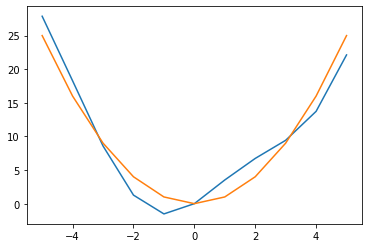

In [187]:
x = linspace(-5, 5, num=11)
y = x*x + sin(x)*3.0
plot(x, y)
plot(x, x*x)
p = polyfit(x, y, 2)
print(p)

[ 9.13847173e-01 -6.69489674e-17]


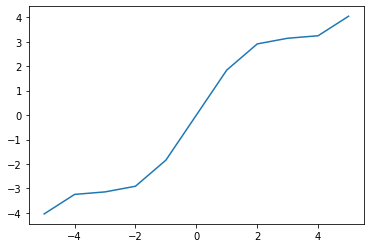

In [182]:
x = linspace(-5, 5, num=11)
y = x + sin(x)
plot(x, y)
p = polyfit(x, y, 1)
print(p)

[ 7.66798803e-01  3.21154385e-16  3.28945303e+00 -8.09089509e-16]


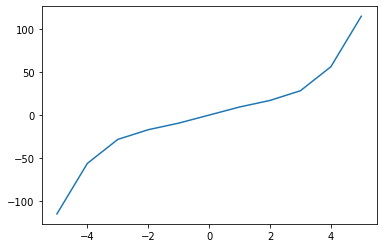

In [202]:
x = linspace(-5, 5, num=11)
y = x*x*x + sin(x)*10.
plot(x, y)
p = polyfit(x, y, 3)
print(p)

In [188]:
%%micropython -unix 1

import ulab
from ulab import poly
from ulab import vector

x = ulab.linspace(-5, 5, num=11)
y = x*x + vector.sin(x)*3.0
p = poly.polyfit(x, y, 2)
print(p)

array([1.0, -0.2584584813768293, 3.552713678800501e-15], dtype=float)




In [183]:
%%micropython -unix 1

import ulab
from ulab import poly
from ulab import vector

x = ulab.linspace(-5, 5, num=11)
y = x + vector.sin(x)
p = poly.polyfit(x, y, 1)
print(p)

array([0.9138471728743898, -8.074349270001139e-17], dtype=float)




In [201]:
%%micropython -unix 1

import ulab
from ulab import poly
from ulab import vector

x = ulab.linspace(-5, 5, num=11)
y = x*x*x + vector.sin(x)*10.0
p = poly.polyfit(x, y, 3)
print(p)

array([0.766798803225857, 0.0, 3.289453031323674, 0.0], dtype=float)




In [208]:
x = linspace(0, 10, num=9)
p = [1, 2, 3]
y = polyval(p, x)
print(y)
print(x)
type(x)

[  3.       7.0625  14.25    24.5625  38.      54.5625  74.25    97.0625
 123.    ]
[ 0.    1.25  2.5   3.75  5.    6.25  7.5   8.75 10.  ]


numpy.ndarray

In [204]:
%%micropython -unix 1

import ulab
from ulab import poly

x = ulab.linspace(0, 10, num=9)
p = [1, 2, 3]
y = poly.polyval(p, x)
print(y)

array([3.0, 7.0625, 14.25, 24.5625, 38.0, 54.56250000000001, 74.25000000000001, 97.06250000000001, 123.0], dtype=float)




In [217]:
a = array([[1, 2, 3], [4, 5, 6], [7, 8, 7]])

inv(a)

array([[-2.16666667,  1.66666667, -0.5       ],
       [ 2.33333333, -2.33333333,  1.        ],
       [-0.5       ,  1.        , -0.5       ]])

In [237]:
%%micropython -unix 1

import ulab
from ulab import linalg

a = ulab.array([[1, 2], [2, 5]])
c = ulab.array([[1, 2, 0, 0], [0, 6, 7, 0], [0, 0, 8, 9], [0, 0, 15, 13]])
b = ulab.array([[1, 2, 3], [4, 5, 6], [7, 8, 7]])
# a = ulab.array([[1, 2, 1, 4], [2, 5, 3, 5], [1, 3, 6, 1], [4, 5, 1, 7]])
print(linalg.inv(a))
print(linalg.eig(a))

array([[5.0, -2.0],
	 [-2.0, 1.0]], dtype=float)
(array([0.1715728752538097, 5.82842712474619], dtype=float), array([[0.9238795325112868, 0.3826834323650898],
	 [-0.3826834323650898, 0.9238795325112868]], dtype=float))




In [241]:
a = array([[1, 2], [2, 5]])
c = array([[1, 2, 0, 0], [0, 6, 7, 0], [0, 0, 8, 9], [0, 0, 15, 13]])
b = array([[1, 2, 3], [4, 5, 6], [7, 8, 7]])
eig(a)

(array([0.17157288, 5.82842712]),
 array([[-0.92387953, -0.38268343],
        [ 0.38268343, -0.92387953]]))

In [287]:
%%micropython -unix 1

import ulab as np

a = np.array([1, 2.2, -3], dtype=np.float)
print(a.round())
b = np.array(a, dtype=np.uint8)
print(b)

array([1.0, 2.0, -3.0], dtype=float)
array([1, 2, 253], dtype=uint8)




In [275]:
a = np.array([1, 2.9, -3], dtype=np.float)
print(a)
b = np.array(a, dtype=np.float)

[ 1.   2.9 -3. ]


In [268]:
a = array([1, 2.8, 3], dtype=float)
np.arctan2([1, 2, 3], 3)

array([0.32175055, 0.5880026 , 0.78539816])

In [25]:
a = array([1, 22.234234, 3])
a = array([1, 2.2, 33.33, 444.444])
a.round(1)

array([  1. ,   2.2,  33.3, 444.4])

In [32]:
logspace(0, 8, num=7)*0.025

array([2.50000000e-02, 5.38608673e-01, 1.16039721e+01, 2.50000000e+02,
       5.38608673e+03, 1.16039721e+05, 2.50000000e+06])

In [27]:
log(1e9)/log(30.0)

6.09293243275961

In [255]:
%%micropython -unix 1

import ulab as np

g = np.array(range(9), dtype=np.float)
a = g.reshape((3,3))
print(a)
a += np.array([0.123, 0.123, 0.123])
print(a)
print(np.around(a, decimals=-1))

array([[0.0, 1.0, 2.0],
       [3.0, 4.0, 5.0],
       [6.0, 7.0, 8.0]], dtype=float)
array([[0.123, 1.123, 2.123],
       [3.123, 4.123, 5.123],
       [6.123, 7.123, 8.122999999999999]], dtype=float)
array([[0.0, 0.0, 0.0],
       [0.0, 0.0, 10.0],
       [10.0, 10.0, 10.0]], dtype=float)




In [120]:
%%micropython -unix 1

import ulab
from ulab import vector

a = ulab.array(range(125)).reshape((5, 5, 5))
print(vector.around(a[::2,::2,::2], decimals=-1))

array([[[0.0, 0.0, 0.0]
[10.0, 10.0, 10.0]
[20.0, 20.0, 20.0]]

[[30.0, 30.0, 30.0]
[40.0, 40.0, 40.0]
[50.0, 50.0, 50.0]]

[[60.0, 60.0, 60.0]
[70.0, 70.0, 70.0]
[80.0, 80.0, 80.0]]], dtype=float)




In [42]:
c = array(range(8), dtype=uint16).reshape((2, 2, 2))
c.strides

(8, 4, 2)

In [257]:
%%micropython -unix 1

import ulab as np

a = np.array(range(9)).reshape((3, 3))
b = np.array(range(9)).reshape((3, 3))
print(np.arctan2(1.0, a))

array([[1.570796326794897, 0.7853981633974483, 0.4636476090008061],
       [0.3217505543966422, 0.2449786631268641, 0.1973955598498808],
       [0.1651486774146268, 0.1418970546041639, 0.1243549945467614]], dtype=float)




In [137]:
arange(0, 10, 3, dtype=int8)

array([0, 3, 6, 9], dtype=int8)

In [135]:
a = array(range(9)).reshape((3, 3))
print(arctan2(a, a))

[[0.         0.78539816 0.78539816]
 [0.78539816 0.78539816 0.78539816]
 [0.78539816 0.78539816 0.78539816]]


In [42]:
arctan2([1, 22.233, 3.], 1.0)

array([0.78539816, 1.52584844, 1.24904577])

# stm32 port

In [69]:
%cd ../../../micropython/ports/stm32/

/home/v923z/sandbox/micropython/v1.11/micropython/ports/stm32


In [ ]:
!rm -rf build-PYBV11
!make BOARD=PYBV11 USER_C_MODULES=../../../ulab all

In [136]:
%%micropython -unix 1

import ulab 

a = ulab.array([[6.058420993051577, 2.018588295338188, 6.307303740008193, 6.743567296659661], [3.760399477657426, 1.501626760992716, 1.020398368879967, 1.903483081086812], [5.20075447514754, 0.7655233559988428, 0.2730999062713479, 5.448723074844875], [3.666587663986214, 0.5528238825462162, 7.759826840359533, 9.887756673795574], [3.228270818725618, 1.784248212712498, 5.302361277197747, 6.772730290987155]])

# a = ulab.array(range(20), dtype=ulab.uint8).reshape((5, 4))
a = ulab.array([[1.13691267467, -0.924652149040, 0.6414371867126509],
                [0.663352446473, -0.622861881082, 0.429580700421],
                [0.330739380869, -0.988163553762, 0.375976807387],
                [0.261990005165, -1.23146889397, 1.02707768970]], dtype=ulab.float)
print(a)
print(ulab.numerical.sort(a, axis=0))

array([[1.13691267467, -0.9246521490400001, 0.6414371867126509],
	 [0.663352446473, -0.622861881082, 0.429580700421],
	 [0.330739380869, -0.9881635537620001, 0.375976807387],
	 [0.261990005165, -1.23146889397, 1.0270776897]], dtype=float)
array([[0.261990005165, -1.23146889397, 0.375976807387],
	 [0.330739380869, -0.9881635537620001, 0.429580700421],
	 [0.663352446473, -0.9246521490400001, 0.6414371867126509],
	 [1.13691267467, -0.622861881082, 1.0270776897]], dtype=float)




In [84]:
%%micropython -unix 1

import ulab

a = ulab.array([[4,5,6],[1,2,3],[7,8,9]])
b = ulab.numerical.argsort(a, axis=None)
print(b)
print(a)

array([3, 4, 5, 0, 1, 2, 6, 7, 8], dtype=uint16)
array([[4.0, 5.0, 6.0],
	 [1.0, 2.0, 3.0],
	 [7.0, 8.0, 9.0]], dtype=float)




In [102]:
%%micropython -unix 1

import ulab

a = ulab.array(range(10), dtype=ulab.uint16)
print(a)
print(a.transpose())

array([0, 1, 2, ..., 7, 8, 9], dtype=uint16)
array([0, 1, 2, ..., 7, 8, 9], dtype=uint16)




In [96]:
%%micropython -unix 1

import ulab

print(ulab.numerical.argmax([[1, 2], [2, 2]]))
# ulab.numerical.argmax(ulab.array([[1,2],[4,3]]))


Traceback (most recent call last):
  File "/dev/shm/micropython.py", line 4, in <module>
TypeError: can't convert list to float



In [76]:
%%micropython -unix 1

import ulab

print(ulab.__version__)
a = ulab.array([1, 2, 3], dtype=ulab.uint8)
b = ulab.array([2, 2, 2])
print(b)
print(a == b)
print(a == 2)
print(2 != a)

0.41.0
array([2.0, 2.0, 2.0], dtype=float)
[False, True, False]
[False, True, False]
[True, False, True]




In [168]:
%%micropython -unix 1

import ulab
from ulab import fft

In [122]:
%%micropython -unix 1

import ulab
from ulab import poly
from ulab import vector

# polynom evaluation
x = ulab.linspace(0, 10, 9)
print(x)
p = [1, 2, 3]
y = poly.polyval(p, x)
print(y)

# linear fit
x = ulab.linspace(-5, 5, num=11)
y = x + vector.sin(x)
p = poly.polyfit(x, y, 1)
print(p)

# quadratic fit
x = ulab.linspace(-5, 5, num=11)
y = x*x + vector.sin(x)*3.0
p = poly.polyfit(x, y, 2)
print(p)

# cubic fit
x = ulab.linspace(-5, 5, num=11)
y = x*x*x + vector.sin(x)*10.0
p = poly.polyfit(x, y, 3)
print(p)

array([0.0, 1.25, 2.5, 3.75, 5.0, 6.25, 7.5, 8.75, 10.0], dtype=float)
array([3.0, 7.0625, 14.25, 24.5625, 38.0, 54.56250000000001, 74.25000000000001, 97.06250000000001, 123.0], dtype=float)
array([0.9138471728743898, -8.074349270001139e-17], dtype=float)
array([1.0, -0.2584584813768293, 3.552713678800501e-15], dtype=float)
array([0.766798803225857, 0.0, 3.289453031323674, 0.0], dtype=float)




In [41]:
a = array([1, 2, 3])
b = array([1, 2, 3, 3])

a == 2

array([False,  True, False])

In [86]:
a = array([1, 2, 3], dtype=uint8)
b = array([1, 2, 3.000001], dtype=float32)
c = array([1, 2, 3.0000001], dtype=float32)
print(a == b, a == c)
a.dtype, b.dtype, c.dtype

[ True  True False] [ True  True  True]


(dtype('uint8'), dtype('float32'), dtype('float32'))

In [32]:
a = array([1], dtype=float)
b = array([0], dtype=int8)
minimum(1, 3)

1

In [114]:
from scipy import optimize

def f(x):
    return x*x-1.1

optimize.bisect(f, 0, 2, maxiter=-100)

ValueError: maxiter should be > 0

In [115]:
%%micropython -unix 1

import ulab
from ulab import approx

def f(x):
    return x*x - 1

print(approx.bisect(f, 0, 4))

0.9999997615814209




In [68]:
%%micropython -unix 1

import ulab
from ulab import poly

x = ulab.array([1, 2, 3, 4, 5])
xp = ulab.array([1, 2, 3, 4])
fp = ulab.array([1, 2, 3, 5])
x = x - 0.2
print(x)
print(poly.interp(x, xp, fp))
print(poly.interp(x, xp, fp, left=0.0))
print(poly.interp(x, xp, fp, right=10.0))

array([0.5, 1.5, 2.5, 3.5, 4.5], dtype=float)
array([1.0, 1.5, 2.5, 4.0, 5.0], dtype=float)
array([0.0, 1.5, 2.5, 4.0, 5.0], dtype=float)
array([1.0, 1.5, 2.5, 4.0, 10.0], dtype=float)




In [70]:
%%micropython -unix 1

import ulab
from ulab import approx

def f(x):
    return x*x*x - 2.0

print(approx.newton(f, 3., tol=0.001, rtol=0.0))
print(approx.bisect(f, 0, 3))

1.259922046961565
1.259921014308929




In [102]:
def bisect(f, a, b, xtol=1.2e-12, maxiter=100):
    if f(a) * f(b) > 0:
        raise ValueError
        
    rtb = a if f(a) < 0.0 else b
    dx = b - a if f(a) < 0.0 else a - b
    for i in range(maxiter):
        dx *= 0.5
        x_mid = rtb + dx
        mid_value = f(x_mid)
        if mid_value < 0:
            rtb = x_mid
        if abs(dx) < xtol:
            break
            
    return rtb

In [73]:
import struct
def binary(num):
    return ''.join(bin(ord(c)).replace('0b', '').rjust(8, '0') for c in struct.pack('!f', num))

In [90]:
%%micropython -unix 1

def f(a, b):
    return a*b

f(1)


Traceback (most recent call last):
  File "/dev/shm/micropython.py", line 5, in <module>
TypeError: f() takes 2 positional arguments but 1 were given



In [83]:
bin(struct.unpack('!i',struct.pack('!f',0.0625/16.))[0])

'0b111011100000000000000000000000'

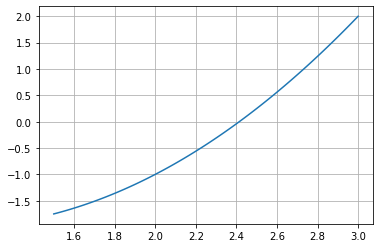

In [46]:
x = linspace(1.5, 3., 100)
plot(x, (x-1)**2 -2)
grid()

In [1]:
def f(x):
    return x*x - 2

# bisect(f, -5, 0)
optimize.newton(f, 3.)

NameError: name 'optimize' is not defined

In [7]:
poly

<function numpy.polyval(p, x)>

In [2]:
from scipy import optimize

In [3]:
optimize.fmin(f, 3)

Optimization terminated successfully.
         Current function value: -2.000000
         Iterations: 19
         Function evaluations: 38


array([-7.10542736e-15])

In [238]:
optimize.least_squares??

In [68]:
%%micropython

import ulab
from ulab import approx

def f(x):
    return (x-1)*(x-1) - 2.0

def bisect(f, a, b, xtol=2.4e-7, maxiter=100):
    if f(a) * f(b) > 0:
        raise ValueError
        
    rtb = a if f(a) < 0.0 else b
    dx = b - a if f(a) < 0.0 else a - b
    for i in range(maxiter):
        dx *= 0.5
        x_mid = rtb + dx
        mid_value = f(x_mid)
        if mid_value < 0:
            rtb = x_mid
        if abs(dx) < xtol:
            break
            
    return rtb

@timeit
def bisect_approx(f, a, b):
    return approx.bisect(f, a, b)

@timeit
def bisect_timed(f, a, b):
    return bisect(f, a, b)

bisect_timed(f, 3, 2)
bisect_approx(f, 3, 2)

execution time:  1242  us
execution time:  631  us



In [226]:
def _minimize_neldermead(func, x0, args=(), callback=None,
                         maxiter=None, maxfev=None, disp=False,
                         return_all=False, initial_simplex=None,
                         xatol=1e-4, fatol=1e-4, adaptive=False,
                         **unknown_options):
    """
    Minimization of scalar function of one or more variables using the
    Nelder-Mead algorithm.

    Options
    -------
    disp : bool
        Set to True to print convergence messages.
    maxiter, maxfev : int
        Maximum allowed number of iterations and function evaluations.
        Will default to ``N*200``, where ``N`` is the number of
        variables, if neither `maxiter` or `maxfev` is set. If both
        `maxiter` and `maxfev` are set, minimization will stop at the
        first reached.
    initial_simplex : array_like of shape (N + 1, N)
        Initial simplex. If given, overrides `x0`.
        ``initial_simplex[j,:]`` should contain the coordinates of
        the j-th vertex of the ``N+1`` vertices in the simplex, where
        ``N`` is the dimension.
    xatol : float, optional
        Absolute error in xopt between iterations that is acceptable for
        convergence.
    fatol : number, optional
        Absolute error in func(xopt) between iterations that is acceptable for
        convergence.
    adaptive : bool, optional
        Adapt algorithm parameters to dimensionality of problem. Useful for
        high-dimensional minimization [1]_.

    References
    ----------
    .. [1] Gao, F. and Han, L.
       Implementing the Nelder-Mead simplex algorithm with adaptive
       parameters. 2012. Computational Optimization and Applications.
       51:1, pp. 259-277

    """
    if 'ftol' in unknown_options:
        warnings.warn("ftol is deprecated for Nelder-Mead,"
                      " use fatol instead. If you specified both, only"
                      " fatol is used.",
                      DeprecationWarning)
        if (np.isclose(fatol, 1e-4) and
                not np.isclose(unknown_options['ftol'], 1e-4)):
            # only ftol was probably specified, use it.
            fatol = unknown_options['ftol']
        unknown_options.pop('ftol')
    if 'xtol' in unknown_options:
        warnings.warn("xtol is deprecated for Nelder-Mead,"
                      " use xatol instead. If you specified both, only"
                      " xatol is used.",
                      DeprecationWarning)
        if (np.isclose(xatol, 1e-4) and
                not np.isclose(unknown_options['xtol'], 1e-4)):
            # only xtol was probably specified, use it.
            xatol = unknown_options['xtol']
        unknown_options.pop('xtol')

    maxfun = maxfev
    retall = return_all

#     fcalls, func = wrap_function(func, args)

    if adaptive:
        dim = float(len(x0))
        rho = 1
        chi = 1 + 2/dim
        psi = 0.75 - 1/(2*dim)
        sigma = 1 - 1/dim
    else:
        rho = 1
        chi = 2
        psi = 0.5
        sigma = 0.5

    nonzdelt = 0.05
    zdelt = 0.00025

    x0 = asfarray(x0).flatten()

    if initial_simplex is None:
        N = len(x0)

        sim = numpy.zeros((N + 1, N), dtype=x0.dtype)
        sim[0] = x0
        for k in range(N):
            y = numpy.array(x0, copy=True)
            if y[k] != 0:
                y[k] = (1 + nonzdelt)*y[k]
            else:
                y[k] = zdelt
            sim[k + 1] = y
    else:
        sim = np.asfarray(initial_simplex).copy()
        if sim.ndim != 2 or sim.shape[0] != sim.shape[1] + 1:
            raise ValueError("`initial_simplex` should be an array of shape (N+1,N)")
        if len(x0) != sim.shape[1]:
            raise ValueError("Size of `initial_simplex` is not consistent with `x0`")
        N = sim.shape[1]

    if retall:
        allvecs = [sim[0]]

    # If neither are set, then set both to default
    if maxiter is None and maxfun is None:
        maxiter = N * 200
        maxfun = N * 200
    elif maxiter is None:
        # Convert remaining Nones, to np.inf, unless the other is np.inf, in
        # which case use the default to avoid unbounded iteration
        if maxfun == np.inf:
            maxiter = N * 200
        else:
            maxiter = np.inf
    elif maxfun is None:
        if maxiter == np.inf:
            maxfun = N * 200
        else:
            maxfun = np.inf

    one2np1 = list(range(1, N + 1))
    fsim = numpy.zeros((N + 1,), float)

    for k in range(N + 1):
        fsim[k] = func(sim[k])

    ind = numpy.argsort(fsim)
    fsim = numpy.take(fsim, ind, 0)
    # sort so sim[0,:] has the lowest function value
    sim = numpy.take(sim, ind, 0)

    iterations = 1

    print(rho, chi, N, sim)
    while (iterations < maxiter):
        if (numpy.max(numpy.ravel(numpy.abs(sim[1:] - sim[0]))) <= xatol and
                numpy.max(numpy.abs(fsim[0] - fsim[1:])) <= fatol):
            break

        xbar = numpy.add.reduce(sim[:-1], 0) / N
        xr = (1 + rho) * xbar - rho * sim[-1]
#         print('xbar, xr, sim: ', xbar, xr, sim[0], sim[-1])
        fxr = func(xr)
        doshrink = 0

        print(fsim)
        if fxr < fsim[0]:
            xe = (1 + rho * chi) * xbar - rho * chi * sim[-1]
            print('expand: ', sim[0], sim[1], xe)
            fxe = func(xe)

            if fxe < fxr:
                sim[-1] = xe
                fsim[-1] = fxe
            else:
                sim[-1] = xr
                fsim[-1] = fxr
        else:  # fsim[0] <= fxr
            if fxr < fsim[-2]:
                sim[-1] = xr
                fsim[-1] = fxr
            else:  # fxr >= fsim[-2]
                # Perform contraction
                print('contract')
                if fxr < fsim[-1]:
                    xc = (1 + psi * rho) * xbar - psi * rho * sim[-1]
                    fxc = func(xc)

                    if fxc <= fxr:
                        sim[-1] = xc
                        fsim[-1] = fxc
                    else:
                        doshrink = 1
                else:
                    print('inside contract')
                    # Perform an inside contraction
                    xcc = (1 - psi) * xbar + psi * sim[-1]
                    fxcc = func(xcc)

                    if fxcc < fsim[-1]:
                        sim[-1] = xcc
                        fsim[-1] = fxcc
                    else:
                        doshrink = 1

                if doshrink:
                    print('shrink')
                    for j in one2np1:
                        sim[j] = sim[0] + sigma * (sim[j] - sim[0])
                        fsim[j] = func(sim[j])

        ind = numpy.argsort(fsim)
        sim = numpy.take(sim, ind, 0)
        fsim = numpy.take(fsim, ind, 0)
        if callback is not None:
            callback(sim[0])
        iterations += 1
        if retall:
            allvecs.append(sim[0])

    x = sim[0]
    fval = numpy.min(fsim)
    warnflag = 0

    return x, func(x)